# Heart Failure Prediction

# 🔎 Dataset Overview

## 💾 The data

The data comes from 'Heart Failure Prediction Dataset' from Kaggle, available in `'heart.csv'`.

#### Each row represents a single people:
- **`Age`** : age of the patient [years]
- **`Sex`** : sex of the patient [M: Male, F: Female]
- **`ChestPainType`** : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **`RestingBP`** : resting blood pressure [mm Hg]
- **`Cholesterol`** : serum cholesterol [mm/dl]
- **`FastingBS`** : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **`RestingECG`** : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **`MaxHR`** : maximum heart rate achieved [Numeric value between 60 and 202]
- **`ExerciseAngina`** : exercise-induced angina [Y: Yes, N: No]
- **`Oldpeak`** : oldpeak = ST [Numeric value measured in depression]
- **`ST_Slope`** : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **`HeartDisease`** : output class [1: heart disease, 0: Normal]


## Classification: Which demographic, clinical, and exercise-related features are the most significant predictors of heart disease?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d
import seaborn as sns

In [2]:
# Loading the Data
heart_df = pd.read_csv("../TeamProject/data/raw/heart.csv")
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Inspect the data
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
# Cheking unique values in HeartDisease column
heart_df['HeartDisease'].unique()

array([0, 1])

In [5]:
# Checking Missing Values
heart_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
#Checking for duplicates 
heart_df.duplicated().sum()

0

In [23]:
heart_df.groupby(['Sex','HeartDisease']).size()

Sex  HeartDisease
F    0               143
     1                50
M    0               267
     1               458
dtype: int64

In [45]:
heart_normal = heart_df[heart_df['HeartDisease']==0]
heart_normal_female = heart_normal[heart_normal['Sex']=='F']
heart_normal_male = heart_normal[heart_normal['Sex']=='M']

heart_disease = heart_df[heart_df['HeartDisease']==1]
heart_disease_female = heart_disease[heart_disease['Sex']=='F']
heart_disease_male = heart_disease[heart_disease['Sex']=='M']

heart_female = heart_df[heart_df['Sex']=='F']
heart_male = heart_df[heart_df['Sex']=='M']

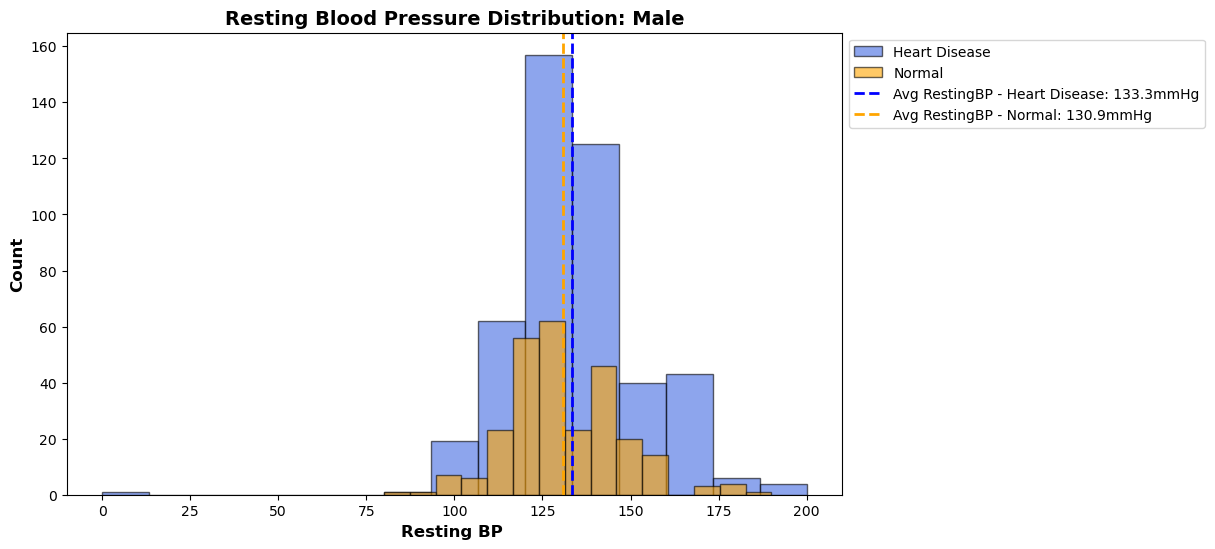

In [50]:
avg_restingBP_male_disease= heart_disease_male['RestingBP'].mean()
avg_restingBP_male_normal= heart_normal_male['RestingBP'].mean()

plt.figure(figsize=(10,6))

plt.hist(heart_disease_male['RestingBP'], bins=15, alpha=0.6, color='royalblue', edgecolor='black', label='Heart Disease')
plt.hist(heart_normal_male['RestingBP'], bins=15, alpha=0.6, color='orange', edgecolor='black', label='Normal')

# Add vertical lines for average salaries
plt.axvline(x=avg_restingBP_male_disease, color='blue', linestyle='--', linewidth=2, label=f"Avg RestingBP - Heart Disease: {avg_restingBP_male_disease:.1f}mmHg")
plt.axvline(x=avg_restingBP_male_normal, color='orange', linestyle='--', linewidth=2, label=f"Avg RestingBP - Normal: {avg_restingBP_male_normal:.1f}mmHg")

# Labels & title
plt.xlabel('Resting BP ', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Resting Blood Pressure Distribution: Male', fontsize=14, fontweight='bold')

# Improve legend placement - legend outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10) 

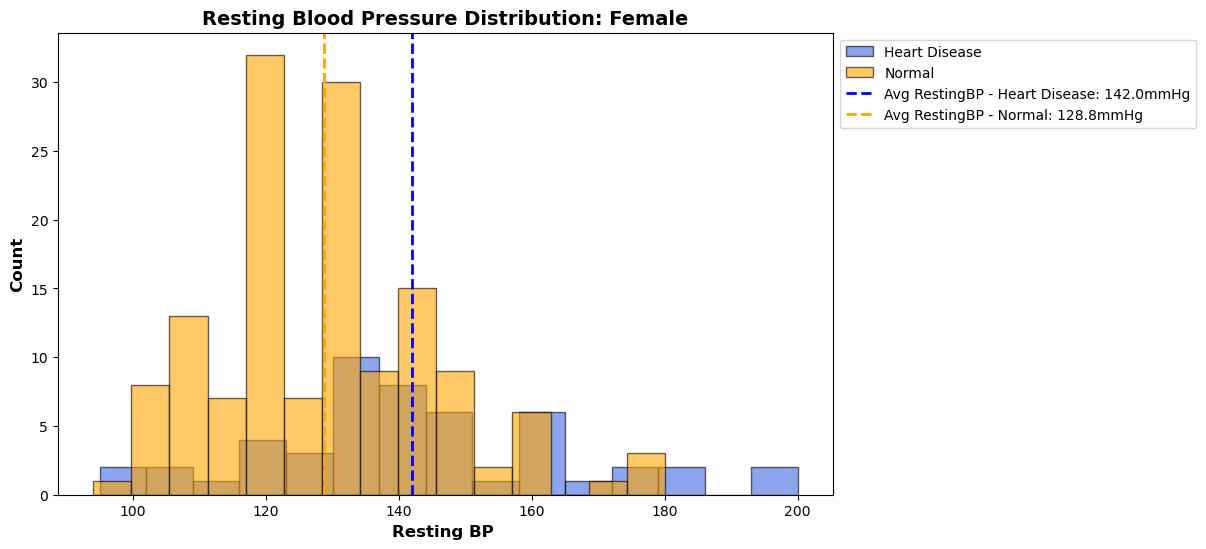

In [51]:
avg_restingBP_female_disease= heart_disease_female['RestingBP'].mean()
avg_restingBP_female_normal= heart_normal_female['RestingBP'].mean()

plt.figure(figsize=(10,6))

plt.hist(heart_disease_female['RestingBP'], bins=15, alpha=0.6, color='royalblue', edgecolor='black', label='Heart Disease')
plt.hist(heart_normal_female['RestingBP'], bins=15, alpha=0.6, color='orange', edgecolor='black', label='Normal')

# Add vertical lines for average salaries
plt.axvline(x=avg_restingBP_female_disease, color='blue', linestyle='--', linewidth=2, label=f"Avg RestingBP - Heart Disease: {avg_restingBP_female_disease:.1f}mmHg")
plt.axvline(x=avg_restingBP_female_normal, color='orange', linestyle='--', linewidth=2, label=f"Avg RestingBP - Normal: {avg_restingBP_female_normal:.1f}mmHg")

# Labels & title
plt.xlabel('Resting BP ', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Resting Blood Pressure Distribution: Female', fontsize=14, fontweight='bold')

# Improve legend placement - legend outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10) 

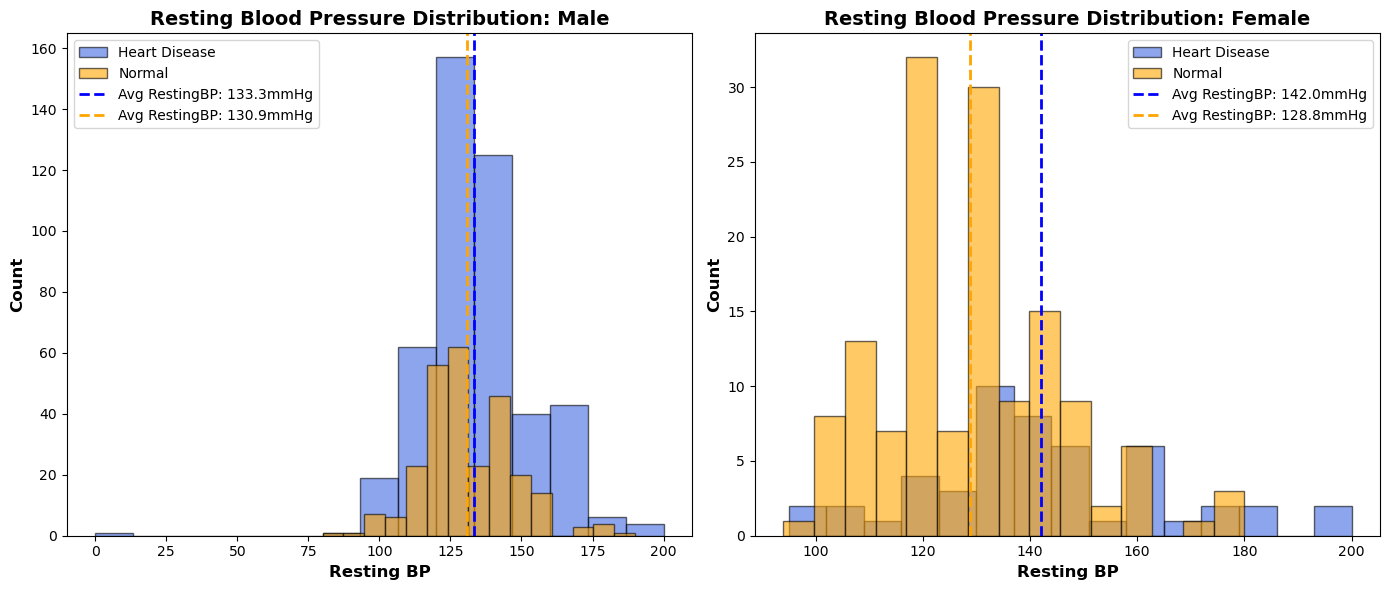

In [57]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 

# ---- Male Resting BP Distribution ----
axes[0].hist(heart_disease_male['RestingBP'], bins=15, alpha=0.6, color='royalblue', edgecolor='black', label='Heart Disease')
axes[0].hist(heart_normal_male['RestingBP'], bins=15, alpha=0.6, color='orange', edgecolor='black', label='Normal')

# Add vertical lines for average RestingBP
axes[0].axvline(x=avg_restingBP_male_disease, color='blue', linestyle='--', linewidth=2, label=f"Avg RestingBP: {avg_restingBP_male_disease:.1f}mmHg")
axes[0].axvline(x=avg_restingBP_male_normal, color='orange', linestyle='--', linewidth=2, label=f"Avg RestingBP: {avg_restingBP_male_normal:.1f}mmHg")

# Labels & title
axes[0].set_xlabel('Resting BP', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Resting Blood Pressure Distribution: Male', fontsize=14, fontweight='bold')
axes[0].legend(loc='upper left', fontsize=10)

# ---- Female Resting BP Distribution ----
axes[1].hist(heart_disease_female['RestingBP'], bins=15, alpha=0.6, color='royalblue', edgecolor='black', label='Heart Disease')
axes[1].hist(heart_normal_female['RestingBP'], bins=15, alpha=0.6, color='orange', edgecolor='black', label='Normal')

# Add vertical lines for average RestingBP
axes[1].axvline(x=avg_restingBP_female_disease, color='blue', linestyle='--', linewidth=2, label=f"Avg RestingBP: {avg_restingBP_female_disease:.1f}mmHg")
axes[1].axvline(x=avg_restingBP_female_normal, color='orange', linestyle='--', linewidth=2, label=f"Avg RestingBP: {avg_restingBP_female_normal:.1f}mmHg")

# Labels & title
axes[1].set_xlabel('Resting BP', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1].set_title('Resting Blood Pressure Distribution: Female', fontsize=14, fontweight='bold')
axes[1].legend(loc='upper right', fontsize=10)

# Adjust layout
plt.tight_layout()  # Prevent overlap
plt.show()


##  Transform Categorical Variables

Transformation of categorical values ​​into numerical ones to work with machine learning models that require numerical inputs, such as KNN, which rely on distance calculations between data points.

| Feature | Type | Encoding Method | Why? |
|----------|----------|----------|----------|
| Sex   |Binary  | 0/1 Mapping   | Only Two Categories |
| ExerciseAngina   | Binary  | 0/1 Mapping  | Only two categories |
| ChestPainType   | Categorical  | One-Hot Encoding  | No meaningful order |
| RestingECG   | Categorical  | One-Hot Encoding  | No meaningful order |
| ST_Slope   | Ordered  | Ordinal Encoding  | Has a meaningful order |


In [ ]:
# Sex (M, F) -> Convert to binary:
heart_df['Sex'] = heart_df['Sex'].map({'M': 1, 'F': 0})

In [ ]:
# ChestPainType (TA, ATA, NAP, ASY)- categories with no meaninful order → Use One-Hot Encoding (creates separate binary columns (0 or 1) for each category):
heart_df = pd.get_dummies(heart_df, columns=['ChestPainType'], drop_first=True)

In [ ]:
# RestingECG (Normal, ST, LVH) → One-Hot Encoding:
heart_df = pd.get_dummies(heart_df, columns=['RestingECG'], drop_first=True)

In [ ]:
# ExerciseAngina (Y, N) → Binary Encoding:
heart_df['ExerciseAngina'] = heart_df['ExerciseAngina'].map({'Y': 1, 'N': 0})

In [ ]:
# ST_Slope - meaningful order: Up > Flat > Down → Ordinal Encoding (ordered categories):
slope_mapping = {'Up': 2, 'Flat': 1, 'Down': 0}
heart_df['ST_Slope'] = heart_df['ST_Slope'].map(slope_mapping)

In [ ]:
heart_df.head(10)

## Visualizing the data

The idea is to understand relationships and correlations between variables. By doing it we can gain insights into which features may contribute the most to predict a Heart Disease.

In [ ]:
# Select only numeric columns
numeric_features = heart_df.select_dtypes(include=['number']).columns

# Creates scatter plots for every combination of numerical features in the dataset
sns.pairplot(heart_df[numeric_features], hue="HeartDisease", diag_kind="kde", palette="viridis", height=2)
plt.figure(figsize=(15,12))
plt.show()


## StandardScaler in Scikit-Learn for continuous numerical features: Age, RestingBP, Cholesterol, MaxHR, Oldpeak

In [ ]:
numerical_features = heart_df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale all the features in the dataset
scaled_features = scaler.fit_transform(numerical_features)

# Create a new DataFrame with scaled features
scaled_heart_df = pd.DataFrame(scaled_features, columns=numerical_features.columns)

# Display the first few rows of the scaled DataFrame
print(scaled_heart_df.head())

In [ ]:
categorical_features = heart_df.drop(columns=numerical_features)
categorical_features.head()

In [ ]:
# Concatenate scaled numeric features with categorical features
scaled_heart_df = pd.concat([scaled_heart_df, categorical_features], axis=1)
scaled_heart_df.head()

## Converting True/False to 0/1 to prevent errors in models

In [ ]:
scaled_heart_df[["ChestPainType_ATA", "ChestPainType_NAP", "ChestPainType_TA", "RestingECG_Normal", "RestingECG_ST"]]

In [ ]:
scaled_heart_df[["ChestPainType_ATA", "ChestPainType_NAP", "ChestPainType_TA", "RestingECG_Normal", "RestingECG_ST"]] = scaled_heart_df[["ChestPainType_ATA", "ChestPainType_NAP", "ChestPainType_TA", "RestingECG_Normal", "RestingECG_ST"]].astype(int)  # Convert True/False to 0/1
scaled_heart_df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = scaled_heart_df.corr()


# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Heart Disease and risk factors")
plt.show()

### Model Initialization and Cross Validation